In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [37]:
start='2012-01-01'
end='2024-08-01'

stock=('TSLA')
data=yf.download(stock,start,end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
data.reset_index(inplace=True)

In [4]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,1.929333,1.966667,1.843333,1.872000,1.872000,13921500
1,2012-01-04,1.880667,1.911333,1.833333,1.847333,1.847333,9451500
2,2012-01-05,1.850667,1.862000,1.790000,1.808000,1.808000,15082500
3,2012-01-06,1.813333,1.852667,1.760667,1.794000,1.794000,14794500
4,2012-01-09,1.800000,1.832667,1.741333,1.816667,1.816667,13455000
...,...,...,...,...,...,...,...
3159,2024-07-25,216.800003,226.000000,216.229996,220.250000,220.250000,100636500
3160,2024-07-26,221.190002,222.279999,215.330002,219.800003,219.800003,94604100
3161,2024-07-29,224.899994,234.270004,224.699997,232.100006,232.100006,129201800
3162,2024-07-30,232.250000,232.410004,220.000000,222.619995,222.619995,100560300


In [5]:
ma_100_days=data.Close.rolling(100).mean()

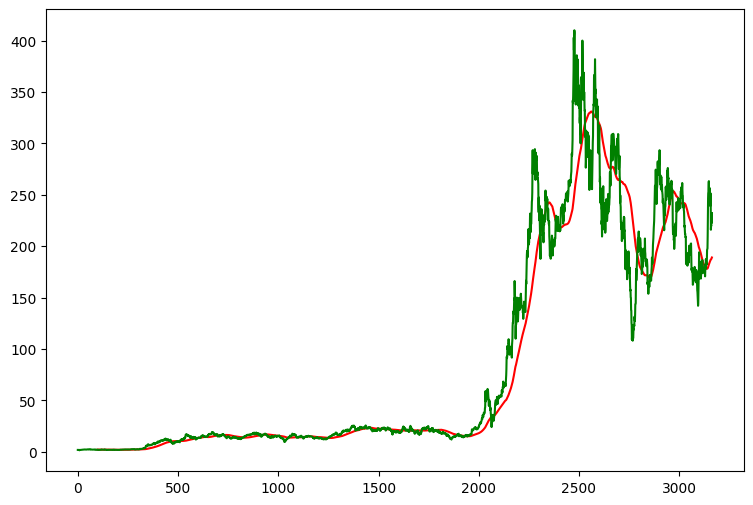

In [6]:
plt.figure(figsize=(9,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')
plt.show()

In [7]:
ma_200_days=data.Close.rolling(200).mean()


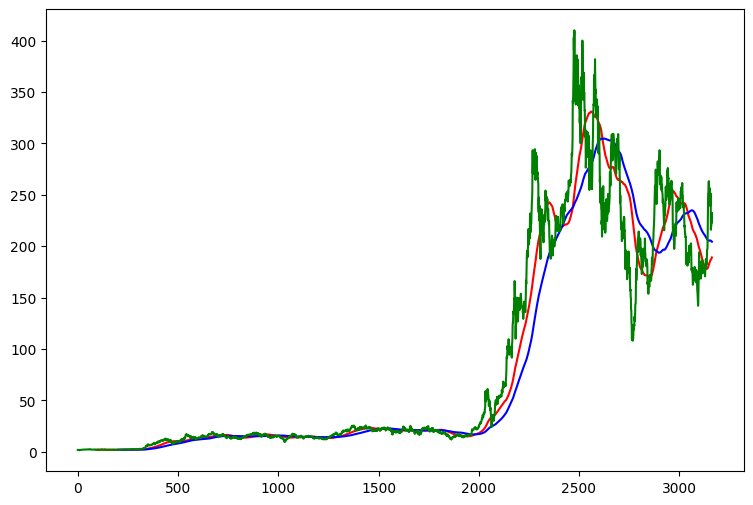

In [8]:
plt.figure(figsize=(9,6))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [9]:
data.dropna(inplace=True)

In [10]:
data_train=pd.DataFrame(data.Close[0:int(len(data)*0.80)])
data_test= pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [11]:
data_train.shape[0]

2531

In [12]:
data_test.shape[0]

633

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [14]:
data_train_scale=scaler.fit_transform(data_train)

In [15]:
x=[]
y=[]
for i in range(100,data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [16]:
x,y=np.array(x), np.array(y)

In [17]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [20]:
model=Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True,
               input_shape=((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [22]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [23]:
model.fit(x,y, epochs=50, batch_size=32,verbose=1)

Epoch 1/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 14s 131ms/step - loss: 0.0269
Epoch 2/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 9s 120ms/step - loss: 0.0028
Epoch 3/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 9s 117ms/step - loss: 0.0023
Epoch 4/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 9s 118ms/step - loss: 0.0034
Epoch 5/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 9s 116ms/step - loss: 0.0027
Epoch 6/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 9s 118ms/step - loss: 0.0023
Epoch 7/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 8s 111ms/step - loss: 0.0029
Epoch 8/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 9s 114ms/step - loss: 0.0024
Epoch 9/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 9s 114ms/step - loss: 0.0023
Epoch 10/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 9s 116ms/step - loss: 0.0022
Epoch 11/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 9s 115ms/step - loss: 0.0019
Epoch 12/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 9s 121ms/step - loss: 0.0022
Epoch 13/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 10s 133ms/step - loss: 0.0021
Epoch 14/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - loss: 0.0019
Epoch 15/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 10s 132ms/step 

In [24]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [25]:
pas_100_days=data_train.tail(100)

In [26]:
data_test=pd.concat([pas_100_days, data_test], ignore_index=True)

In [27]:
data_test_scale=scaler.fit_transform(data_test)

In [28]:
x=[]
y=[]
for i in range(100,data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])

x,y=np.array(x), np.array(y)

In [29]:
y_predict=model.predict(x)

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


In [30]:
scale=1/scaler.scale_

In [31]:
y_predict=y_predict*scale

In [32]:
y=y*scale

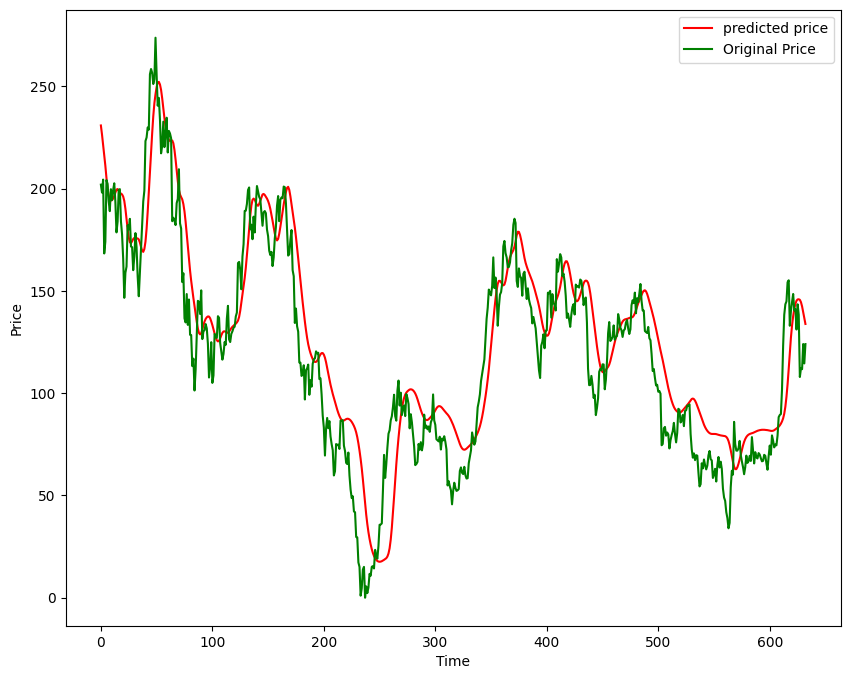

In [33]:
plt.figure(figsize=(10,8))
plt.plot(y_predict,'r',label='predicted price')
plt.plot(y, 'g', label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [36]:
model.save('stock prediction.keras')